In [1]:
import random
import string
import time
from NtruEncrypt import *
from Polynomial import Zx
from num_to_polynomial import *


In [2]:
def generate_string(l):
    m = ''.join([random.choice(string.ascii_letters + string.digits) for n in range(l)])
    return m

In [3]:
message = []
for i in range(1,11):
    message.append(generate_string(i*100))
print(message)

['siEmqTAlrS3oxzHuLWHxSPB5yqw4W2icB5WSoL8gX4XrSlBVFdHYAsV2XwJIl1HV8mAfrhwpE7MheIWkZGnauXVqWJwApB1HPt45', '8uyomls3Dt7Npe5UsPXTou4sAo8N51bjoLyxOvuSd9x0bUZP74aIE60bQRb79PqyL2kEcfuPyJDDwKRBoeJFmR9I0Z9SJZ7q9FErFWXyNrIdaCkLqEH1LmqkDx5HF7as7ZQHHZAuJUBW36dRPYWLDiYXDx07Uzkfjv46IcnmigIBFl1OhYHTJPYRY07pXGrmvrsoZTbq', 'Tvzl8vxiCbPTJIPEYw38Sguq1LQ8B3tV5W2wJ0jCIl3PNXmnl3sjSy0zEPBhrYLSz9gvhTmSJc6HnqoWzpCoBhcqv7DRvVZNu8WfZi4N5f9VQbs209Nfy4MaJb0AeYFrKYLJj7LWzoL8urwa6nJskIy7V4wIZ7b82BLxXUD924oquEvpuSSqlfF8oNNdLuygpvWzTWPTkHHj2hYaMZmmjUdpYvAWaGDcpqk6xxfm5Iz56UK2cPGpj9UyUK1rnzpWa5WmMlkjdFVDojtiYztvN7GNIdpvh3Ow77x8r4PGoVhE', 'RUYx04ysHYbx7YCcO37rMutEw17ngGMUKZr4j7mBfWWS4hlVMkRKYxFrP7XzyCtBiAu6gE3dDlRSG5dKXUtzEAHGbMW0BX27sjyq7tns5WQ6rLFUJB2aI22LzfsJ3N6Cq2suK9DciglzRX3QYvNwBSZUTIsioN1MEOKt8oDBYH0wpRljKAS283LSa2n6QcVq9CiEME2eMtZDeyQuPcqgehfpsR0OjXHvRcHfaXenoR1WQlZtA98ASokitGLZUcWyrAL6GoC1WwzJZzdRUrTAm5beJVUYAEm4o9Oiwbfd6GVkSN3fuFwsBIz6kzg4nkkFC73EEJWeB8rpHLxlFZZSxpJ4QBEN5KPQ1pbtvqLdNM5wQAfS0dBfqEuXWnI4vbQpRl

In [4]:
def encrypt_decrypt(message,elliptic_a,elliptic_b,d,p,q):
    character_polynomials,N = koblitz_encoder(message,elliptic_a,elliptic_b) 
    public_key,private_key = generate_keypair(p,q,d,N)
    cipher_polys = []
    for element in character_polynomials:
        cipher_text = encrypt(element,public_key,d,N,q)
        cipher_polys.append(cipher_text)
    dec_w = []
    for element in cipher_polys:
        decrypted_message = decrypt(element,private_key,p,q,N)
        dec_w.append(decrypted_message.coeffs)
    decrypted_plain_text = koblitz_decoder(points_decoder(dec_w))
    if decrypted_plain_text == message:
        return True
    else:
        return False

In [5]:
d = 5
p = 3
q = 128
time_taken = []
for msg in message:
    t1 = time.time()
    result = encrypt_decrypt(msg,9,7,d,p,q)
    t2 = time.time()
    print(t2-t1)
    time_taken.append(t2-t1)


0.3132212162017822
0.4601268768310547
0.744093656539917
0.7337934970855713
1.1180391311645508
1.2552769184112549
1.4147422313690186
1.7700581550598145
1.9001352787017822
2.1019256114959717


In [6]:
message_length = []
for i in range(1,11):
    message_length.append(i*100)
print(message_length)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


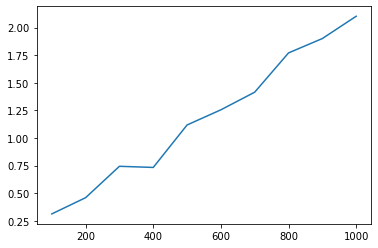

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(message_length, time_taken)